In [ ]:
# Model Inferencing by referening Pretrained Model

In [1]:
# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import cv2

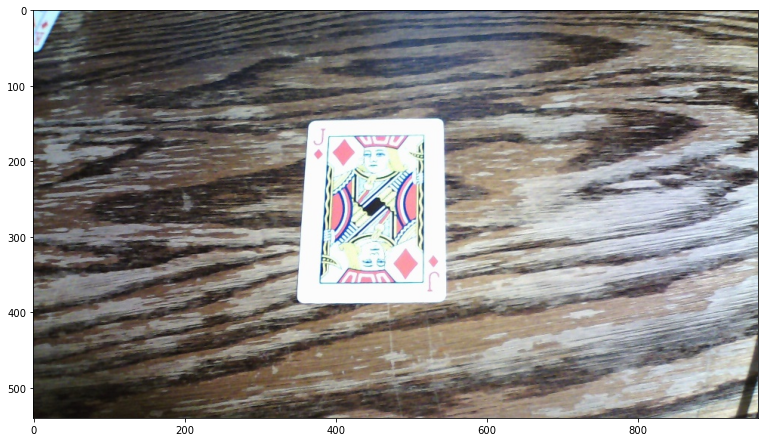

In [5]:
# get image
im = cv2.imread("C:/Users/data_detectron2/train/cam_image13.jpg")

import matplotlib.pyplot as plt
plt.figure(figsize=(15,7.5))
plt.imshow(im[..., ::-1]) #bgr to rgb

In [6]:

# Create config
cfg = get_cfg()
cfg.merge_from_file("C:/Model Output/output/config.yml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = "C:/Model Output/output/output/model_final.pth"

In [7]:
# Create predictor

# If getting AssertionError: Torch not compiled with CUDA enabled detectron2. Then do the below given line
cfg.MODEL.DEVICE = "cpu"

predictor = DefaultPredictor(cfg)

outputs = predictor(im)

<Figure size 720x360 with 0 Axes>

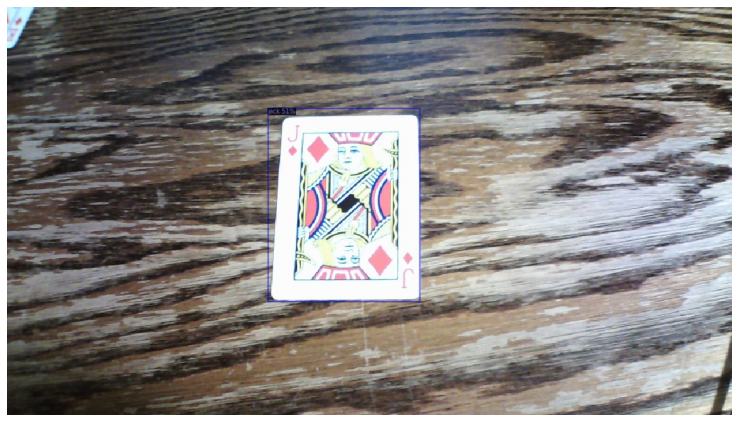

In [9]:
# We can use `Visualizer` to draw the predictions on the image.
MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes = ['ace','jack','king','nine','queen','ten']
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

def cv2_imshow(im):
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(25,7.5)), plt.imshow(im), plt.axis('off');
plt.figure(figsize=(10,5))

cv2_imshow(out.get_image()[:, :, ::-1])